In [1]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')

import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns
import tifffile as tff


In [2]:
# columns = ['Date','Plate','Well','Cell','Mutation','Transfected_date','Leak','Ra','dFF_p','dFF_s','F0',
#            'amp_on_single',
#            'amp_off_single','tau_on_single','tau_off_single','bleach_x','bleach','amp_on_f_double',
#            'amp_on_s_double','amp_off_f_double','amp_off_s_double','tau_on_f_double','tau_off_f_double',
#            'tau_on_s_double','tau_off_s_double','time_on_10-90','time_off_10-90','Leak_min','Ra_max']
# df = pd.DataFrame(columns = columns)
# df


### Load params from .mat file

In [3]:
# sumPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/summary'
# imgPath = '/Volumes/genie/BenArthur/patch-screen/bot'
# rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
sumPath = '/Users/zhengj10/Desktop/Data anlysis collection/PatcherBot/summary'
imgPath = '/Users/zhengj10/Desktop/Data anlysis collection/PatcherBot/processed_peak_0324'
rawPath = '/Users/zhengj10/Desktop/Data anlysis collection/PatcherBot/raw'
os.path.exists(imgPath)


True

In [4]:
datePath = pb.getPathInfo(imgPath)
# datePath = ['2020.03.02_000']
# datePath = datePath[9:]
datePath


['2020.02.24_000']

In [5]:
df = pd.read_pickle(sumPath + '/summary_sel.pkl')
# df.index = np.arange(1,len(df)+1)
print(len(df))
# df = df.drop(df.index[69:161])
# print(len(df))
df

195


,Date,Plate,Well,Cell,Mutation,Transfected_date,Leak,Ra,dFF,F0,...,amp_off_f_double,amp_off_s_double,tau_on_f_double,tau_off_f_double,tau_on_s_double,tau_off_s_double,time_on_10-90,time_off_10-90,Leak_min,Ra_max
1,2019.09.25_000,plate_001,well_2,patch_attempt_0012_000,376.13,190917,"[-150.62214260854606, -156.73247141159365, -15...","[29.101746442538236, 29.36422833087751, 27.974...","[0.21154442965350378, 0.05447614530240068, -0....","[30.526748667800522, 30.495355085829924, 28.46...",...,"[0.19829310341480222, 0.05237638864695172, -0....","[-0.011660853457648824, -0.0013976254056384879...","[10.28929540808796, 3.342739941496405e-05, 0.0...","[4.45997662600979, 8.47251279442955, 0.4857696...","[9082.568847296088, 307.0062229204669, 61.4998...","[36.01721187528639, 18.22206114757082, 1120.69...","[40.95230908901209, 382.58857305813706, 74.317...","[9.149115747795804, 18.098135448244875, 154.40...",-187.897774,29.364228
2,2019.10.03_000,plate_000,well_2,patch_attempt_0000_000,414.1,190917,"[-52.56728984695625, -54.515694908245756, -57....","[10.03278975675201, 9.66932092545869, 9.899996...","[0.14971078242154173, 0.03277202337170709, -0....","[49.831077980933244, 50.83147068761971, 48.285...",...,"[0.07557318040126008, 0.0335907193302546, -0.0...","[0.037177352894476844, 0.004449897499321141, -...","[4.231990147435045, 0.014048774358720456, 1.44...","[1.0642325014873768, 7.641127636404736, 7.9620...","[1154.7681463951506, 113.84484371400428, 4554....","[281.67862784920624, 0.003431752443871692, 463...","[633.7626865610905, 103.09150031397655, 599.32...","[227.45609344684135, 16.637277759541803, 18.02...",-65.240862,12.248053
3,2019.10.04_000,plate_001,well_2,patch_attempt_0008_000,376.20950,190924,"[-110.69457444028764, -119.98159104189334, -11...","[32.860524148088714, 29.005170174127542, 28.21...","[0.2617984378000566, 0.09340262421998993, -0.0...","[55.4972048317512, 55.30518546730073, 53.58653...",...,"[0.11484265759076219, 0.025806228244713996, -0...","[0.1387326350407675, 0.048923108795886204, -0....","[7.843996762429953, 18.298478843251438, 15.567...","[6.4975272551915815, 6.613302358368283, 16.194...","[46.17461149046838, 18.833181509431775, 15.536...","[29.170377905289044, 21.011840605655312, 932.9...","[65.18492536400095, 40.500867807351426, 34.188...","[48.41708586995696, 38.37410027505098, 47.4995...",-120.218035,33.596295
4,2019.10.04_000,plate_001,well_2,patch_attempt_0009_000,376.20950,190924,"[-43.91325968685166, -49.60465765884757, -53.6...","[12.982651910997683, 13.245196750148796, 12.96...","[0.26309689684171317, 0.0876305946375098, -0.0...","[35.76497498054718, 35.60531113179193, 33.7570...",...,"[0.11493911789725277, 0.04992664523571448, -0....","[0.11600762530325436, 0.023786869822733862, -0...","[4.317184907149623, 23.112564843347158, 2.4406...","[2.03619179654769, 7.924110550486381, 5.491408...","[31.492388851425662, 22.966618702098128, 14.07...","[15.598342229648242, 25.559849845512737, 41485...","[51.29831809021556, 50.70240960056299, 22.1424...","[24.78325414753226, 31.7615174477628, 12.07316...",-67.868962,13.245197
5,2019.10.04_000,plate_001,well_2,patch_attempt_0011_000,376.20950,190924,"[-79.41604453683719, -83.81521692013307, -85.6...","[12.298922373883848, 13.898703089557467, 12.49...","[0.2543398759089761, 0.08576917658669707, -0.0...","[85.71180531709238, 84.02042960513562, 81.7694...",...,"[0.149325602523869, 0.06163224528565957, -0.07...","[0.09339473119671356, 0.016697372114628076, -0...","[4.984436108259992, 7.347072749802888, 5.91474...","[5.381528193866046, 10.043337771513661, 10.292...","[29.922390972038276, 24.520808832489415, 35.69...","[25.821412662515165, 10.950251758171493, 844.8...","[44.92757303401174, 26.744907978865626, 26.808...","[34.20312912661461, 22.4975962500514, 31.07376...",-102.721044,13.898703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020.03.02_000,plate_004,well_1,patch_attempt_0036_000,421.4892,200225,"[-14.81750601

In [6]:
idx_del = df[(df['Mutation'] == '421.1')].index
# idx_del
df.drop(idx_del, inplace=True)
df




,Date,Plate,Well,Cell,Mutation,Transfected_date,Leak,Ra,dFF,F0,...,amp_off_f_double,amp_off_s_double,tau_on_f_double,tau_off_f_double,tau_on_s_double,tau_off_s_double,time_on_10-90,time_off_10-90,Leak_min,Ra_max
1,2019.09.25_000,plate_001,well_2,patch_attempt_0012_000,376.13,190917,"[-150.62214260854606, -156.73247141159365, -15...","[29.101746442538236, 29.36422833087751, 27.974...","[0.21154442965350378, 0.05447614530240068, -0....","[30.526748667800522, 30.495355085829924, 28.46...",...,"[0.19829310341480222, 0.05237638864695172, -0....","[-0.011660853457648824, -0.0013976254056384879...","[10.28929540808796, 3.342739941496405e-05, 0.0...","[4.45997662600979, 8.47251279442955, 0.4857696...","[9082.568847296088, 307.0062229204669, 61.4998...","[36.01721187528639, 18.22206114757082, 1120.69...","[40.95230908901209, 382.58857305813706, 74.317...","[9.149115747795804, 18.098135448244875, 154.40...",-187.897774,29.364228
2,2019.10.03_000,plate_000,well_2,patch_attempt_0000_000,414.1,190917,"[-52.56728984695625, -54.515694908245756, -57....","[10.03278975675201, 9.66932092545869, 9.899996...","[0.14971078242154173, 0.03277202337170709, -0....","[49.831077980933244, 50.83147068761971, 48.285...",...,"[0.07557318040126008, 0.0335907193302546, -0.0...","[0.037177352894476844, 0.004449897499321141, -...","[4.231990147435045, 0.014048774358720456, 1.44...","[1.0642325014873768, 7.641127636404736, 7.9620...","[1154.7681463951506, 113.84484371400428, 4554....","[281.67862784920624, 0.003431752443871692, 463...","[633.7626865610905, 103.09150031397655, 599.32...","[227.45609344684135, 16.637277759541803, 18.02...",-65.240862,12.248053
3,2019.10.04_000,plate_001,well_2,patch_attempt_0008_000,376.20950,190924,"[-110.69457444028764, -119.98159104189334, -11...","[32.860524148088714, 29.005170174127542, 28.21...","[0.2617984378000566, 0.09340262421998993, -0.0...","[55.4972048317512, 55.30518546730073, 53.58653...",...,"[0.11484265759076219, 0.025806228244713996, -0...","[0.1387326350407675, 0.048923108795886204, -0....","[7.843996762429953, 18.298478843251438, 15.567...","[6.4975272551915815, 6.613302358368283, 16.194...","[46.17461149046838, 18.833181509431775, 15.536...","[29.170377905289044, 21.011840605655312, 932.9...","[65.18492536400095, 40.500867807351426, 34.188...","[48.41708586995696, 38.37410027505098, 47.4995...",-120.218035,33.596295
4,2019.10.04_000,plate_001,well_2,patch_attempt_0009_000,376.20950,190924,"[-43.91325968685166, -49.60465765884757, -53.6...","[12.982651910997683, 13.245196750148796, 12.96...","[0.26309689684171317, 0.0876305946375098, -0.0...","[35.76497498054718, 35.60531113179193, 33.7570...",...,"[0.11493911789725277, 0.04992664523571448, -0....","[0.11600762530325436, 0.023786869822733862, -0...","[4.317184907149623, 23.112564843347158, 2.4406...","[2.03619179654769, 7.924110550486381, 5.491408...","[31.492388851425662, 22.966618702098128, 14.07...","[15.598342229648242, 25.559849845512737, 41485...","[51.29831809021556, 50.70240960056299, 22.1424...","[24.78325414753226, 31.7615174477628, 12.07316...",-67.868962,13.245197
5,2019.10.04_000,plate_001,well_2,patch_attempt_0011_000,376.20950,190924,"[-79.41604453683719, -83.81521692013307, -85.6...","[12.298922373883848, 13.898703089557467, 12.49...","[0.2543398759089761, 0.08576917658669707, -0.0...","[85.71180531709238, 84.02042960513562, 81.7694...",...,"[0.149325602523869, 0.06163224528565957, -0.07...","[0.09339473119671356, 0.016697372114628076, -0...","[4.984436108259992, 7.347072749802888, 5.91474...","[5.381528193866046, 10.043337771513661, 10.292...","[29.922390972038276, 24.520808832489415, 35.69...","[25.821412662515165, 10.950251758171493, 844.8...","[44.92757303401174, 26.744907978865626, 26.808...","[34.20312912661461, 22.4975962500514, 31.07376...",-102.721044,13.898703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020.03.02_000,plate_004,well_1,patch_attempt_0036_000,421.4892,200225,"[-14.81750601

In [7]:
col = ['Mutation','dFF']
df_sel = pd.DataFrame(columns = col)
df_sel.Mutation = df.Mutation
df_sel.dFF = df.dFF
df_sel

,Mutation,dFF
1,376.13,"[0.21154442965350378, 0.05447614530240068, -0...."
2,414.1,"[0.14971078242154173, 0.03277202337170709, -0...."
3,376.20950,"[0.2617984378000566, 0.09340262421998993, -0.0..."
4,376.20950,"[0.26309689684171317, 0.0876305946375098, -0.0..."
5,376.20950,"[0.2543398759089761, 0.08576917658669707, -0.0..."
...,...,...
191,421.4892,"[0.11583420562003724, 0.03696721132149956, -0...."
192,421.4892,"[0.11748785794771978, 0.03791881408070738, -0...."
193,421.4892,"[0.10367199139594227, 0.032805135386817556, -0..."
194,421.4892,"[0.11859832829448518, 0.04170944263576116, -0...."


In [10]:
data_all={}
for param in(df_sel.columns):
    data_all[param] = []
for date in datePath:
    platePath = pb.getPathInfo(os.path.join(imgPath,date))
    for plate in platePath:
        cellPath = pb.getPathInfo(os.path.join(imgPath, date, plate))
        for cell in(cellPath):
            print(cell)
            matFiles = glob(os.path.join(imgPath, date, plate, cell) + '/*.mat')
            if len(matFiles) < 9:
                print('bad trial: ' + '/' + date + '/' + plate + '/' + cell)
                continue
            dFF_p = []
            for trial in range(9):
                matFile = os.path.join(imgPath,date,plate,cell) + '/' + str(trial).zfill(3) + '.mat'
                f = h5py.File(matFile,'r')
                d = f['params']['fit_pix_alpha_single']
                st = d[0]
                obj = f[st]
                dff_p = obj['bkg_norm_ave_dFoF0_transient'][()][0]
                dFF_p.append(dff_p)
            data_all['Mutation'].append('421.1_peak')
            data_all['dFF'].append(dFF_p)
            dFF_s = []
            for trial in range(9):
                matFile = os.path.join(imgPath,date,plate,cell) + '/' + str(trial).zfill(3) + '.mat'
                f = h5py.File(matFile,'r')
                d = f['params']['fit_pix_alpha_single']
                st = d[0]
                obj = f[st]
                dff_s = obj['bkg_norm_ave_on_dFoF0_plateau'][()][0]
                dFF_s.append(dff_s)
            data_all['Mutation'].append('421.1_steady')
            data_all['dFF'].append(dFF_s)
            
            

patch_attempt_0001_000
patch_attempt_0004_000
patch_attempt_0008_000
patch_attempt_0010_000
patch_attempt_0012_000
patch_attempt_0013_000


In [11]:
df_new = pd.DataFrame(data_all, columns = list(df_sel))
df_new

,Mutation,dFF
0,421.1_peak,"[0.025862771747832854, 0.010789395583172635, -..."
1,421.1_steady,"[0.025862771747840983, 0.01129362297619924, -0..."
2,421.1_peak,"[0.022992673009570645, 0.009905942429265126, -..."
3,421.1_steady,"[0.022992673009570645, 0.00805942161068714, -0..."
4,421.1_peak,"[0.040368364311890156, 0.014499935611702515, -..."
5,421.1_steady,"[0.040368364311890156, 0.014499935611733546, -..."
6,421.1_peak,"[0.03189238267307257, 0.011653746648529655, -0..."
7,421.1_steady,"[0.031892382673130035, 0.011653757536278737, -..."
8,421.1_peak,"[0.021080172878824712, 0.006735779084589902, -..."
9,421.1_steady,"[0.021080178793929753, 0.006738785677412122, -..."


In [12]:
df_sel = df_sel.append(df_new, ignore_index = True)
df_sel.index = np.arange(1, len(df_sel)+1)
df_sel

,Mutation,dFF
1,376.13,"[0.21154442965350378, 0.05447614530240068, -0...."
2,414.1,"[0.14971078242154173, 0.03277202337170709, -0...."
3,376.20950,"[0.2617984378000566, 0.09340262421998993, -0.0..."
4,376.20950,"[0.26309689684171317, 0.0876305946375098, -0.0..."
5,376.20950,"[0.2543398759089761, 0.08576917658669707, -0.0..."
...,...,...
191,421.1_steady,"[0.031892382673130035, 0.011653757536278737, -..."
192,421.1_peak,"[0.021080172878824712, 0.006735779084589902, -..."
193,421.1_steady,"[0.021080178793929753, 0.006738785677412122, -..."
194,421.1_peak,"[0.028318380037070875, 0.014698949951973472, -..."


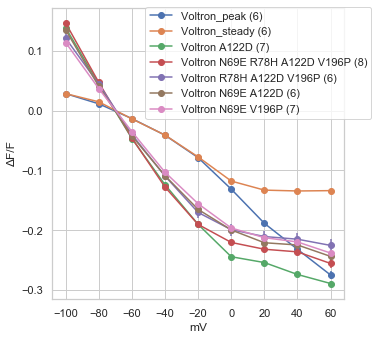

In [20]:
import unicodedata
import seaborn as sns
sns.set()
sns.set_style(style='whitegrid')

fig = plt.figure(figsize=[5.35,5])
params = ['dFF']
x_label = 'mV'
y_label = [unicodedata.lookup("GREEK CAPITAL LETTER delta") + 'F/F']

labels = {
            '421.1_peak':'Voltron_peak',
            '421.1_steady':'Voltron_steady',
            '421.2096':'Voltron A122D',
            '421.4909':'Voltron N69E R78H A122D V196P',
            '421.4919':'Voltron R78H A122D V196P',
            '421.4876':'Voltron N69E A122D',
            '421.4892':'Voltron N69E V196P'
         }

for i in range(len(params)):
    ax = plt.subplot(1,1,i+1)
    
    for sensor in ['421.1_peak','421.1_steady','421.2096','421.4909','421.4919','421.4876','421.4892']: 
        df_sensor = df_sel[df_sel.Mutation == sensor]
        param_mean = np.nanmean(df_sensor[params[i]].tolist(), axis=0)
        param_sem = np.nanstd(df_sensor[params[i]].tolist(), axis=0)/(len(df_sensor)-1)
        x = np.linspace(-100,60,9)
        ax.errorbar(x, param_mean, yerr = param_sem, fmt = 'o-', label = labels[sensor]+' (%d)' %len(df_sensor))
    ax.legend()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label[i])

handles, labels = ax.get_legend_handles_labels() # Following 3 lines remove the errorbars from legend
handles = [h[0] for h in handles]
ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.3, 0.6))
plt.setp(ax, xticks=x)
plt.tight_layout()
# plt.legend()
# fig.savefig('/Users/zhengj10/Desktop/Voltron_variants_dFF.png',dpi=1200)
plt.show()
